Q1-2021


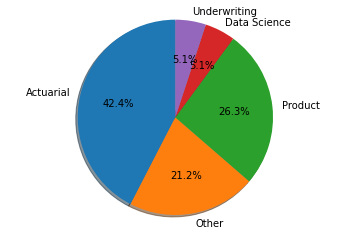

Q4-2020


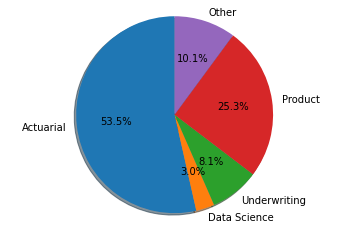

Q4-2019


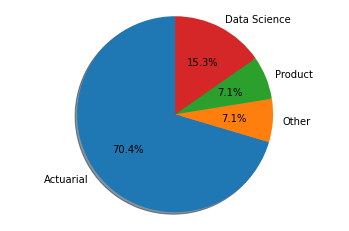

Q2-2020


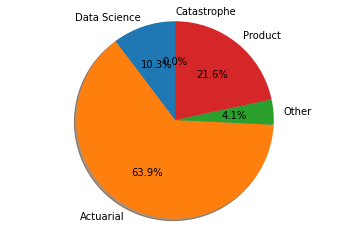

Q3-2020


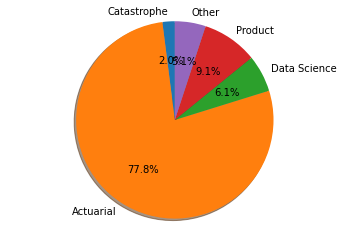

Q1-2020


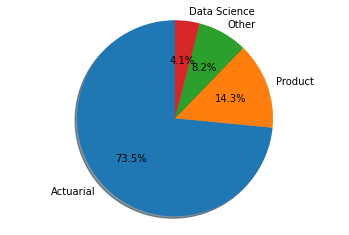

Q2-2019


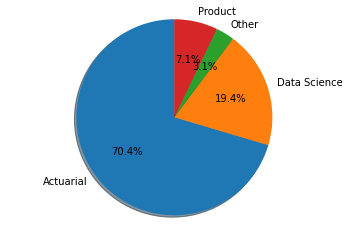

Q1-2019


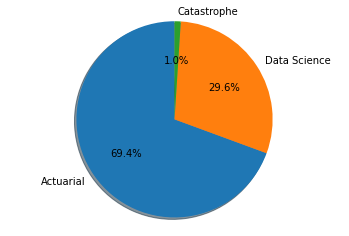

Q4-2018


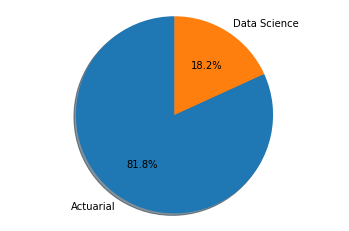

Q3-2019


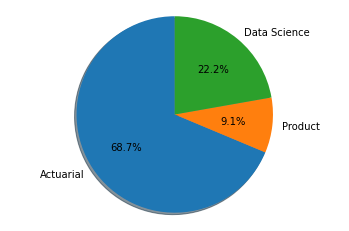

In [91]:
import csv
import plotly.figure_factory as ff
import pandas as pd
from plotly.offline import iplot
import plotly.express as px
from colour import Color
import matplotlib.pyplot as plt


def remove_char(jobs, punc):
    for job_1 in jobs:
        for ele in job_1[-1]:
            job_1[-1]=job_1[-1].replace("\n"," ")
            if(ele in punc):
                job_1[-1] = job_1[-1].replace(ele," ")
    return jobs




def convert_to_list(x):
    stop_words = ["i", "a", "an", "the" "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    x[-1] = x[-1].split(" ")
    y = x[-1]
    x[-1] = []
    for z in y:
        if ((z.lower() != "") and (z.lower() not in stop_words)):
            x[-1].append(z)
    return x[-1]


def dict_words(jobs):
    words = {}
    for job in jobs:
        for ele in job[-1]:
            ele = ele.lower()
            if(ele in words.keys()):
                words[ele]+=1
            else:
                words[ele]=1
    return words



def plot_states(state_map,state):
    fig = px.choropleth(locations=state.keys(), 
                        locationmode="USA-states", 
                        color=list(state.values()), 
                        color_continuous_scale="Blues",
                        scope="usa")
    fig.show()
    
def plot_state(state,state_abbv):
    colorscale = [
        '#FDEDEC',
        '#FADBD8',
        '#F5B7B1',
        '#F1948A',
        '#E74C3C',
        '#B03A2E',
        '#78281F',
    ]
    if(state_abbv == "IL"):
        colorscale = [
        '#FDEDEC',
        '#78281F',
    ]
    if(state_abbv == "MI"):
        colorscale = [
        '#FDEDEC',
        '#F5B7B1',
        '#E74C3C',
        '#78281F',
    ]
    print(state)
    fips = []
    values = []
    for i in list(state.values()):
        values.append(i[0])
        fips.append(i[1])
    fig = ff.create_choropleth(
        fips=fips, values=values, scope=[state_abbv],
        show_state_data = True,
        colorscale=colorscale,
        county_outline={'color': 'black', 'width': 0.75}, round_legend_values=True,
        state_outline={'color':'black', 'width':1.0},
        legend_title='Jobs in '+ state_abbv
    )
    fig.layout.template = None
    fig.show()
    
    
def get_geo_dict(fields,jobs):
    geo_dict = {}
    loc = fields.index('Location')
    for job in jobs:
        if(job[loc] in geo_dict):
            geo_dict[job[loc]]+=1
        else:
            geo_dict[job[loc]] = 1
    return geo_dict

def get_jobs_in_loc(geo,add_state):
    state_dict = {}
    ca = {}
    for i in geo:
        if(i!=""):
            if(";" in i):
                x = i.split("; ")[1]
                if(x in state_dict.keys()):
                    state_dict[x] += geo[i]
                    if(x==add_state):
                        if(i.split("; ")[0] in ca.keys()):
                            ca[i.split("; ")[0]] +=geo[i]
                        else:
                            ca[i.split("; ")[0]] = geo[i]
                    
                else:
                    state_dict[x] = geo[i]
                    if(x==add_state):
                        if(i.split("; ")[0] in ca.keys()):
                            ca[i.split("; ")[0]] +=geo[i]
                        else:
                            ca[i.split("; ")[0]] = geo[i]
            else:
                state_dict['IL'] += 2
    return [state_dict, ca]



def create_county(state,file,state_name):
    fips = {}
    county = {}
    with open(file,'r') as csvfile:
        reader = csv.reader(csvfile)
        for location in reader:
            if(location[0] in state):
                if(location[1] in county.keys()):
                    county[location[1]][0]+=state[location[0]]
                else:
                    county[location[1]]=[state[location[0]]]
    with open('national_county.csv','r') as csvfile:
        reader = csv.reader(csvfile)
        for i in reader:
            x = str(i[0]).split(",")
            if(x[0]==state_name):
                y = x[3].split(" County")[0]
                if(y not in fips):
                    fips[y]=str(x[1])+str(x[2])
                    if(y in county):
                        if(len(county[y])<2):
                            county[y].append(fips[y])
    return county

def abbv_map_create():
    state_abbv = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
    state_map = []
    for i in range(len(state_abbv)):
        state_map.append(i)
    return state_map
        
def get_data():
    fields=[]
    jobs=[]
    dates = []
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    words = {}
    state_map = abbv_map_create()

    with open('loxo.csv','r') as csvfile:
        reader = csv.reader(csvfile)
        fields = next(reader)

        for job in reader:
            jobs.append(job)

        jobs = remove_char(jobs,punc)
        for x in jobs:
            dates.append(x[3])
            x[-1] = convert_to_list(x)
            

        words = dict_words(jobs)

        words = sorted(words.items(), key=lambda x: x[1], reverse=True)
        return [jobs,words,fields,dates]
    
def sort_states(state):
    sorted_state = {}
    sorted_keys = sorted(state, key=state.get)  # [1, 3, 2]

    for w in sorted_keys:
        sorted_state[w] = state[w]
    return sorted_state
        
def quarters(dates):
    quarters = []
    for i in dates:
        date = i.split("-")
        quarter = ""
        year = str(date[-1])
        if(date[0] in ["1","2","3"]):
            quarter = "Q1"
        elif(date[0] in ["4","5","6"]):
            quarter = "Q2"
        elif(date[0] in ["7","8","9"]):
            quarter = "Q3"
        elif(date[0] in ["11","10","12"]):
            quarter = "Q4"
        quarters.append(quarter + "-20" + year)
    return quarters

def typify(jq):
    for i in range(0,len(jq)):
        if("actuarial" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("actuary" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("data" in jq[i][0].lower()):
            jq[i].append("Data Science")
        elif("predictive" in jq[i][0].lower()):
            jq[i].append("Data Science")
        elif("modeling" in jq[i][0].lower()):
            jq[i].append("Data Science")
        elif("underwriter" in jq[i][0].lower()):
            jq[i].append("Underwriting")
        elif("underwriting" in jq[i][0].lower()):
            jq[i].append("Underwriting")
        elif("product" in jq[i][0].lower()):
            jq[i].append("Product")
        elif("catastrophe" in jq[i][0].lower()):
            jq[i].append("Catastrophe")
        elif("consultant" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("consulting" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("reserving" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("insurtech" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("risk" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("p&c" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("rating" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        elif("pricing" in jq[i][0].lower()):
            jq[i].append("Actuarial")
        else:
            jq[i].append("Other")
    return jq

def pie(quarter_dict):
    for key in quarter_dict.keys():
            label = quarter_dict[key]
            print(key)
            types = {}
            for typ in quarter_dict[key]:
                if typ in types:
                    types[typ]+=1
                else:
                    types[typ]=1
            sizes = []
            for t in types.keys():
                sizes.append(types[t])
            total = 0
            for i in sizes:
                total += i
            for i in range(0,len(sizes)):
                sizes[i] = int((sizes[i]/total)*100)
            labels = types.keys()
            fig1, ax1 = plt.subplots()
            ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
                    shadow=True, startangle=90)
            ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            plt.show()

def main():
        data = get_data()
        jobs = data[0]
        keywords = data[1]
        fields = data[2]
        dates = data[3]
        
        
        dates = quarters(dates)
        job_titles = []
        for j in jobs:
            job_titles.append(j[0])
        job_quarters = []
        for i in range(0,len(job_titles)):
            job_quarters.append([job_titles[i],dates[i]])
        job_type_quarter = typify(job_quarters)
        quarter_dict = {}
        for i in job_type_quarter:
            if(i[1] in quarter_dict.keys()):
                quarter_dict[i[1]].append(i[2])
            else:
                quarter_dict[i[1]]=[i[2]]
        
        
        
        #geos = get_geo_dict(fields,jobs)
        #state_abbv = str(input("Type the abbv of the state you would like to view\n\n"))
        #dicts = get_jobs_in_loc(geos, state_abbv)
        #states = dicts[0]
        #cities = dicts[1]
        #states = sort_states(states)
        #state_map = abbv_map_create()
        #print(cities)
        #csv_file = str(input("Type the name of the csv file you need for this state\n\n"))
        #county = create_county(cities,csv_file,state_abbv)
        #print(county)
        
        #plot_states(state_map, states)
        #plot_state(county, state_abbv)
        #print(job_titles)
        
        pie(quarter_dict)
    


main()
